# Data analysis of GW150914

Download calibrated data timeseries from LIGO Hanford and Livingston observatories using gwpy.

In [1]:
from gwpy.timeseries import TimeSeries
h1 = TimeSeries.fetch_open_data('H1', 1126259457, 1126259467)
#l1 = TimeSeries.fetch_open_data('L1', 1126259457, 1126259467)

h1b = h1.bandpass(50,250).notch(60).notch(120)
#l1b = l1.bandpass(50,250).notch(60).notch(120)

## 1. Prepare the waveform.

Prepare the template accordingly to parameters of the GW150914 event in the gw-openscience.org database:

https://www.gw-openscience.org/events/GW150914/

In the coalescence participated two black holes with masses:

m1 = 36.2 Ms

m2 = 29.1 Ms

Pay attantion to the right sampling of the template!

In [2]:
# Import necessary libraries.
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

In [3]:
#h1b.to_pycbc()

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=36.2,
                         mass2=29.1,
                         delta_t=h1b.dt.value,
                         f_lower=30,
                         distance=420)

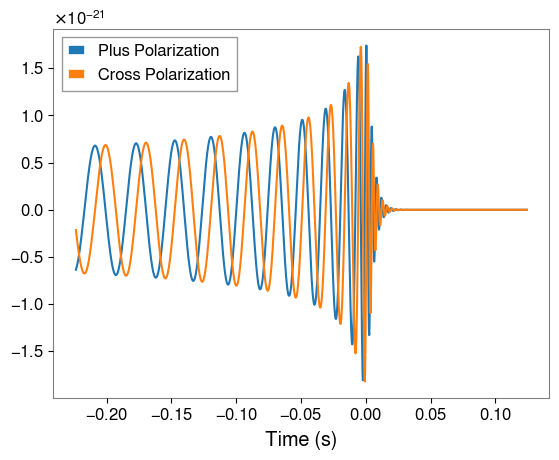

In [4]:
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
#pylab.xlim(-.05, .01)
pylab.legend()
pylab.grid()
pylab.show()

## 2. Apply the matched filter.

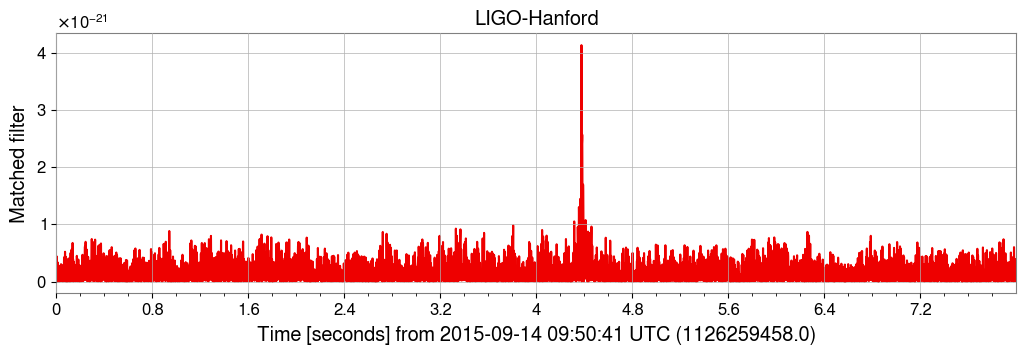

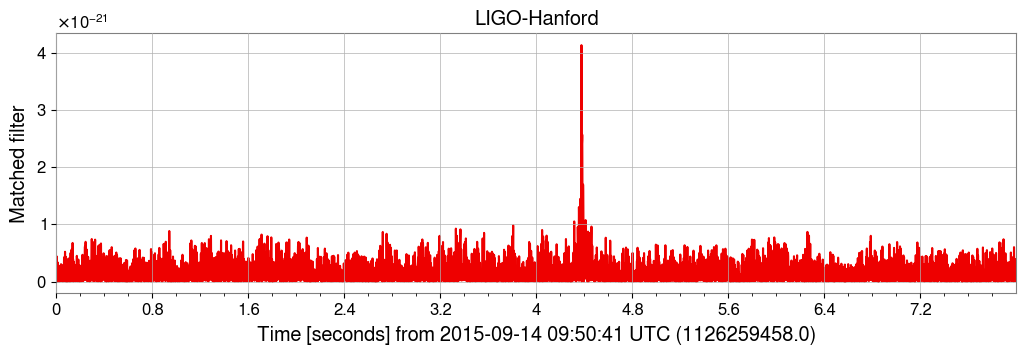

In [19]:
from astropy import units as u

p_template = TimeSeries(hp, dt=hp.delta_t)
c_template = TimeSeries(hc, dt=hc.delta_t)

# Remove time corrupted by the template filter: 1s from the beginning and 1s from the end.

h1b.correlate(p_template).abs().crop(h1b.times[0]+1*u.s, h1b.times[-1]-1*u.s).plot(ylabel="Matched filter", title='LIGO-Hanford', color='gwpy:ligo-hanford')
#l1b.correlate(p_template).plot(ylabel="Matched filter", title='LIGO-Livingston', color='gwpy:ligo-livingston')

## 3. Apply matched filter directly to raw data.
Matched filter is not a universal solution. When it is applied direclty to raw data is does not bring any advantage.

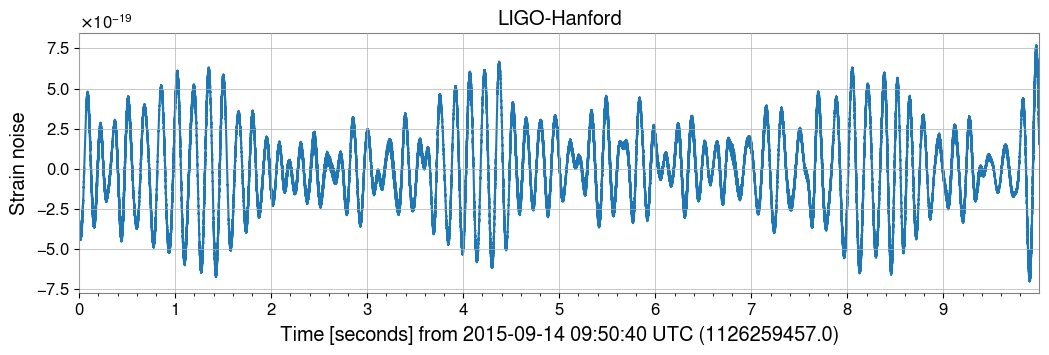

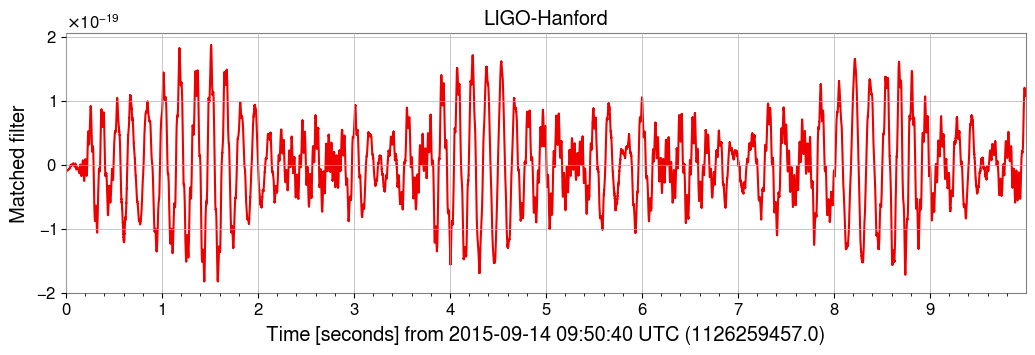

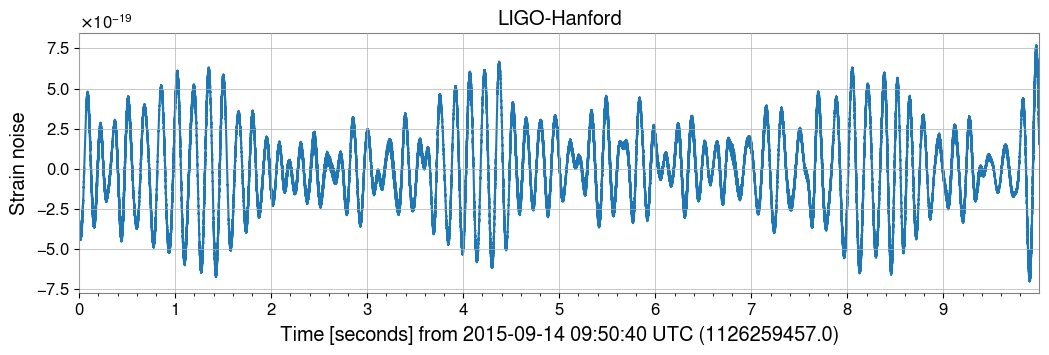

In [20]:
h1.correlate(p_template).plot(ylabel="Matched filter", title='LIGO-Hanford', color='gwpy:ligo-hanford')
h1.plot(ylabel='Strain noise', title='LIGO-Hanford')